In [1]:
from functions import reterive_clean_data
import matplotlib.pyplot as plt


In [2]:
df = reterive_clean_data('team')

/home/ali/Desktop/EuroFootballClustering/functions.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_player['potential'].fillna(df_player['potential'].mean(), inplace = True)
/home/ali/Desktop/EuroFootballClustering/functions.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [3]:
df

,id_team,team_long_name,team_short_name,id_team_attribute,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,FC Aarau,AAR,1,9930,2010-02-22 00:00:00,0.666667,0,NaN,0,...,0.568966,2,Organised,0.551020,2,0.645833,2,45,Normal,0
1,49119,FC Aarau,AAR,2,9930,2014-09-19 00:00:00,0.533333,0,48.0,2,...,0.724138,2,Organised,0.489796,2,0.416667,2,54,Normal,0
2,49119,FC Aarau,AAR,3,9930,2015-09-10 00:00:00,0.450000,0,41.0,2,...,0.724138,2,Organised,0.489796,2,0.416667,2,54,Normal,0
3,39393,Aberdeen,ABE,4,8485,2010-02-22 00:00:00,0.833333,1,NaN,0,...,0.827586,1,Organised,0.755102,2,0.958333,1,70,Wide,0
4,39393,Aberdeen,ABE,5,8485,2011-02-22 00:00:00,0.450000,0,NaN,0,...,0.517241,2,Organised,0.489796,2,0.479167,2,52,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,3,SV Zulte-Waregem,ZUL,1454,10000,2011-02-22 00:00:00,0.533333,0,NaN,0,...,0.534483,2,Organised,0.469388,2,0.500000,2,53,Normal,0
1454,3,SV Zulte-Waregem,ZUL,1455,10000,2012-02-22 00:00:00,0.566667,0,NaN,0,...,0.482759,2,Organised,0.428571,2,0.645833,2,53,Normal,0
1455,3,SV Zulte-Waregem,ZUL,1456,10000,2013-09-20 00:00:00,0.566667,0,NaN,0,...,0.172414,0,Organised,0.428571,2,0.708333,2,37,Normal,0
1456,3,SV Zulte-Waregem,ZUL,1457,10000,2014-09-19 00:00:00,0.566667,0,42.0,2,...,0.172414,0,Organised,0.428571,2,0.708333,2,37,Normal,0


In [4]:
from config.config import config
df_new_cluster=df[config.cluster_team]

In [5]:
df_new_cluster

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceDefenderLineClass
0,0.666667,0,0.500000,0.661017,0.750000,0.568966,0.551020,0.645833,0
1,0.533333,0,0.600000,0.559322,0.716667,0.724138,0.489796,0.416667,0
2,0.450000,0,0.566667,0.559322,0.716667,0.724138,0.489796,0.416667,0
3,0.833333,1,0.833333,0.830508,0.833333,0.827586,0.755102,0.958333,0
4,0.450000,0,0.533333,0.542373,0.466667,0.517241,0.489796,0.479167,0
...,...,...,...,...,...,...,...,...,...
1453,0.533333,0,0.533333,0.525424,0.466667,0.534483,0.469388,0.500000,0
1454,0.566667,0,0.516667,0.440678,0.533333,0.482759,0.428571,0.645833,0
1455,0.566667,0,0.516667,0.440678,0.533333,0.172414,0.428571,0.708333,0
1456,0.566667,0,0.516667,0.440678,0.533333,0.172414,0.428571,0.708333,0


#### 1)training the models and evaluate them

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score


models={"kmeans":KMeans(n_clusters=2,random_state=42),"DBSCAN":DBSCAN(min_samples=5,eps=0.3),"Hiérarchique":AgglomerativeClustering(n_clusters=3)}

for name,model in models.items():
    clusters = model.fit_predict(df_new_cluster)
    if len(set(clusters))>1:
        silhouette = silhouette_score(df_new_cluster,clusters)
        db_score = davies_bouldin_score(df_new_cluster,clusters)
        print(f"Model : {name}, Silhouette Score : {silhouette}, Davies-Bouldin Score: {db_score}")
    else:
        print(f"Model: {name} resulted in only one cluster.")

Model : kmeans, Silhouette Score : 0.6058002531911456, Davies-Bouldin Score: 0.6177468634384143
Model : DBSCAN, Silhouette Score : 0.1536010698797808, Davies-Bouldin Score: 1.3429571302948142
Model : Hiérarchique, Silhouette Score : 0.48153206290216305, Davies-Bouldin Score: 0.910995634746577


#### we chose kmeans because it gave us the best groups


In [7]:
df['clusters']=KMeans(n_clusters=2,random_state=42).fit_predict(df_new_cluster)

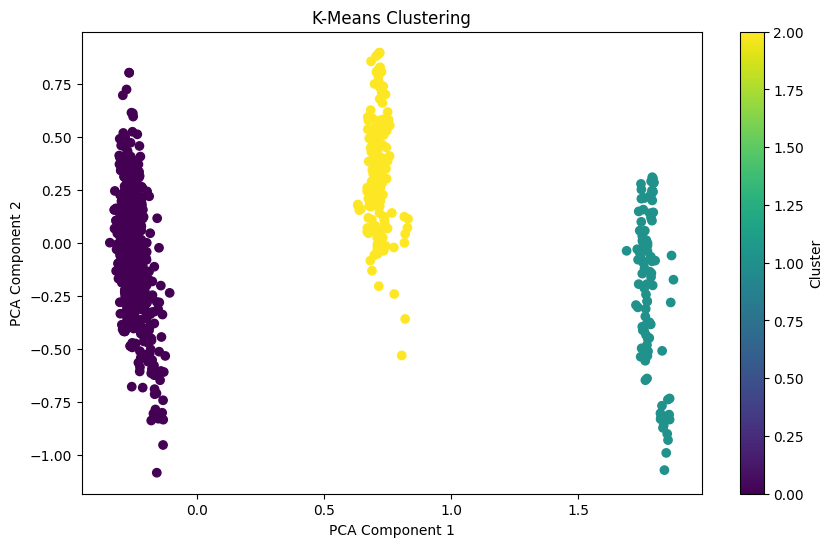

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_new_cluster)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [9]:
print(df[df['clusters']==0].head(50)['team_long_name'].to_list())

['FC Aarau', 'FC Aarau', 'FC Aarau', 'Aberdeen', 'Aberdeen', 'Aberdeen', 'Aberdeen', 'Aberdeen', 'Aberdeen', 'AC Ajaccio', 'AC Ajaccio', 'AC Ajaccio', 'AC Ajaccio', 'AC Ajaccio', 'AC Ajaccio', 'Milan', 'Milan', 'Milan', 'Milan', 'Milan', 'Milan', 'Académica de Coimbra', 'Académica de Coimbra', 'Académica de Coimbra', 'Académica de Coimbra', 'ADO Den Haag', 'ADO Den Haag', 'ADO Den Haag', 'ADO Den Haag', 'ADO Den Haag', 'Ajax', 'Ajax', 'Ajax', 'Ajax', 'UD Almería', 'UD Almería', 'UD Almería', 'UD Almería', 'UD Almería', 'UD Almería', 'RSC Anderlecht', 'RSC Anderlecht', 'RSC Anderlecht', 'RSC Anderlecht', 'RSC Anderlecht', 'RSC Anderlecht', 'Angers SCO', 'Angers SCO', 'Angers SCO', 'Angers SCO']


In [10]:
print(df[df['clusters']==1].head(50)['team_long_name'].to_list())

['Académica de Coimbra', 'Académica de Coimbra', 'ADO Den Haag', 'Ajax', 'Ajax', 'Arka Gdynia', 'AC Arles-Avignon', 'Arsenal', 'Arsenal', 'AJ Auxerre', 'FC Barcelona', 'Bari', 'CF Os Belenenses', 'SL Benfica', 'Borussia Mönchengladbach', 'Borussia Mönchengladbach', 'SC Braga', 'SC Braga', 'Brescia', 'Brescia', 'Carpi', 'Cesena', 'Córdoba CF', 'Cracovia', 'De Graafschap', 'RC Deportivo de La Coruña', 'Elche CF', 'Empoli', 'FC Porto', 'Feyenoord', 'Frosinone', 'Getafe CF', 'Getafe CF', 'Getafe CF', 'GKS Bełchatów', 'Polonia Bytom', 'Grasshopper Club Zürich', 'Heracles Almelo', 'TSG 1899 Hoffenheim', 'Jagiellonia Białystok', 'Jagiellonia Białystok', 'Juventus', 'Korona Kielce', 'KV Kortrijk', 'UD Las Palmas', 'FC Lausanne-Sports', 'Lechia Gdańsk', 'Legia Warszawa', 'Leixões SC', 'RC Lens']


In [11]:
df

,id_team,team_long_name,team_short_name,id_team_attribute,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,clusters
0,49119,FC Aarau,AAR,1,9930,2010-02-22 00:00:00,0.666667,0,NaN,0,...,2,Organised,0.551020,2,0.645833,2,45,Normal,0,0
1,49119,FC Aarau,AAR,2,9930,2014-09-19 00:00:00,0.533333,0,48.0,2,...,2,Organised,0.489796,2,0.416667,2,54,Normal,0,0
2,49119,FC Aarau,AAR,3,9930,2015-09-10 00:00:00,0.450000,0,41.0,2,...,2,Organised,0.489796,2,0.416667,2,54,Normal,0,0
3,39393,Aberdeen,ABE,4,8485,2010-02-22 00:00:00,0.833333,1,NaN,0,...,1,Organised,0.755102,2,0.958333,1,70,Wide,0,0
4,39393,Aberdeen,ABE,5,8485,2011-02-22 00:00:00,0.450000,0,NaN,0,...,2,Organised,0.489796,2,0.479167,2,52,Normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,3,SV Zulte-Waregem,ZUL,1454,10000,2011-02-22 00:00:00,0.533333,0,NaN,0,...,2,Organised,0.469388,2,0.500000,2,53,Normal,0,0
1454,3,SV Zulte-Waregem,ZUL,1455,10000,2012-02-22 00:00:00,0.566667,0,NaN,0,...,2,Organised,0.428571,2,0.645833,2,53,Normal,0,0
1455,3,SV Zulte-Waregem,ZUL,1456,10000,2013-09-20 00:00:00,0.566667,0,NaN,0,...,0,Organised,0.428571,2,0.708333,2,37,Normal,0,0
1456,3,SV Zulte-Waregem,ZUL,1457,10000,2014-09-19 00:00:00,0.566667,0,42.0,2,...,0,Organised,0.428571,2,0.708333,2,37,Normal,0,0


In [12]:

def first_row(group):
    return group.iloc[3]


df_clusters= df.groupby('clusters').apply(first_row).reset_index(drop=True)
df_clusters=df_clusters[[ 'buildUpPlaySpeed',  'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression']]

/tmp/ipykernel_21362/3478363688.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clusters= df.groupby('clusters').apply(first_row).reset_index(drop=True)


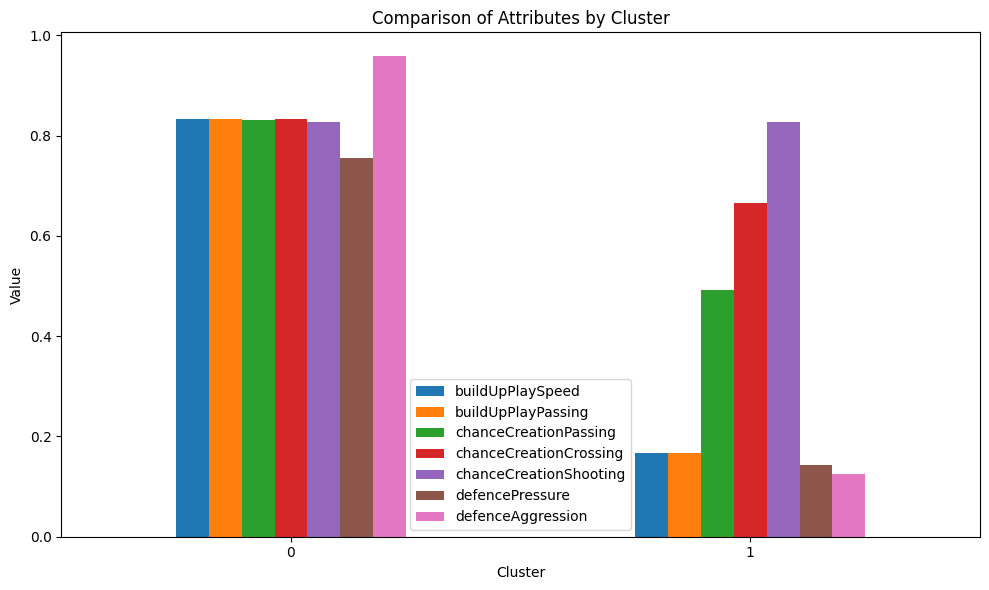

In [13]:
df_clusters.plot(kind='bar', figsize=(10, 6))

plt.title('Comparison of Attributes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### groups:
#####   0==>defensive
#####   1==>offensive


In [14]:
def type_player(x):
    if x == 0 :
        return 'defensive'
 
    else:
        return 'offensive'

df['type']=  df['clusters'].apply(type_player)


In [15]:
df.head(35)

,id_team,team_long_name,team_short_name,id_team_attribute,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,clusters,type
0,49119,FC Aarau,AAR,1,9930,2010-02-22 00:00:00,0.666667,0,NaN,0,...,Organised,0.551020,2,0.645833,2,45,Normal,0,0,defensive
1,49119,FC Aarau,AAR,2,9930,2014-09-19 00:00:00,0.533333,0,48.0,2,...,Organised,0.489796,2,0.416667,2,54,Normal,0,0,defensive
2,49119,FC Aarau,AAR,3,9930,2015-09-10 00:00:00,0.450000,0,41.0,2,...,Organised,0.489796,2,0.416667,2,54,Normal,0,0,defensive
3,39393,Aberdeen,ABE,4,8485,2010-02-22 00:00:00,0.833333,1,NaN,0,...,Organised,0.755102,2,0.958333,1,70,Wide,0,0,defensive
4,39393,Aberdeen,ABE,5,8485,2011-02-22 00:00:00,0.450000,0,NaN,0,...,Organised,0.489796,2,0.479167,2,52,Normal,0,0,defensive
5,39393,Aberdeen,ABE,6,8485,2012-02-22 00:00:00,0.633333,0,NaN,0,...,Organised,0.346939,2,0.333333,2,60,Normal,0,0,defensive
6,39393,Aberdeen,ABE,7,8485,2013-09-20 00:00:00,0.700000,0,NaN,0,...,Organised,0.387755,2,0.375000,2,60,Normal,0,0,defensive
7,39393,Aberdeen,ABE,8,8485,2014-09-19 00:00:00,0.633333,0,64.0,2,...,Organised,0.367347,2,0.375000,2,60,Normal,0,0,defensive
8,39393,Aberdeen,ABE,9,8485,2015-09-10 00:00:00,0.650000,0,64.0,2,...,Free Form,0.530612,2,0.437500,2,63,Normal,0,0,defensive
9,11817,AC Ajaccio,AJA,10,8576,2010-02-22 00:00:00,0.666667,0,NaN,0,...,Organised,0.142857,0,0.958333,1,30,Narrow,1,0,defensive
